# Predicting the Class using Pre-Trained model


Welcome to this **project on Image Classification with Pre-trained Keras models. This project aims to impart the knowledge of how to access the pre-trained models(here we get pre-trained ResNet model) from Keras of TensorFlow 2, and appreciate its powerful classification capacity by making the model predict the class of an input image.**

Understanding the pre-trained models is very important because this forms the basis of transfer learning. one of the most appreciated techniques to perform the classification of a different task thus reducing the training time, the number of iterations, and resource consumption. Learning about the pre-trained models and working hands-on with such models is thus very crucial in deep learning, and the same is the aim of this project.

Developed Skills:

TensorFlow 2

Python Programming

Deep Learning

# Introduction
In this project, we will be using resnet50 which was originally trained to classify the imagenet data. We shall use this model to predict the class of an input image. We shall understand the different steps of preprocessing this input image as required by the network, before predicting the class of the image.

# Importing the Modules
Let's begin by importing the necessary modules.

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
np.random.seed(42)
tf.random.set_seed(42)

# Getting the Model and Pre-trained Weights
We need to include models and processing packages that are specific to that model.

In [7]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50 as myModel
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions

Now get the model model and include the weights of "imagenet" data classification task. We will be using this trained network to predict the class of our desired image.

In [8]:
model = myModel(weights="imagenet")

102973440/102967424 [==============================] - 3s 0us/step


# Loading the Image
Let us load the image we want to classify using this model.

In [15]:
#the path to load the image we want to classify using the model.
img_path = '/cxldata/dlcourse/lion.jpg'

In [16]:
#Resnet50 needs inputs of size (224, 224).
img = image.load_img(img_path, target_size=(224, 224))

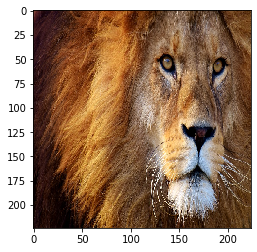

In [17]:
plt.imshow(np.asarray(img))

# Predicting the Class using Pre-Trained model
Now that we have loaded the image and the pre-trained network, we shall preprocess the image, feed it to the neural network to predict the class of the image.

**Note:**

- image.img_to_array : Converts a PIL Image instance to a Numpy array.

- tensorflow.keras.applications.resnet50.preprocess_input : The images are converted from RGB to BGR, then each color channel is zero-centered with respect to the ImageNet dataset, without scaling.

- tensorflow.keras.applications.resnet50.decode_predictions : Decodes the prediction into a list of tuples (class, description, probability)

In [20]:
x = image.img_to_array(img) #Converts the PIL image img to np array x using image.img_to_array function.


In [21]:
x

array([[[132.,  81.,  64.],
        [125.,  72.,  56.],
        [124.,  67.,  56.],
        ...,
        [ 80.,  37.,   5.],
        [ 75.,  34.,   4.],
        [ 81.,  42.,  13.]],

       [[134.,  81.,  63.],
        [126.,  70.,  57.],
        [112.,  55.,  48.],
        ...,
        [ 93.,  53.,  18.],
        [ 87.,  49.,  13.],
        [109.,  71.,  35.]],

       [[142.,  86.,  69.],
        [124.,  67.,  56.],
        [107.,  49.,  45.],
        ...,
        [104.,  65.,  32.],
        [ 87.,  49.,  13.],
        [ 83.,  48.,  10.]],

       ...,

       [[ 39.,  19.,  18.],
        [ 26.,  10.,  11.],
        [ 29.,  13.,  14.],
        ...,
        [118.,  85.,  52.],
        [ 61.,  37.,  13.],
        [ 80.,  55.,  25.]],

       [[ 31.,  11.,  12.],
        [ 21.,   5.,   6.],
        [ 26.,   7.,   9.],
        ...,
        [112.,  79.,  44.],
        [ 68.,  44.,  18.],
        [ 72.,  47.,  17.]],

       [[ 33.,  13.,  15.],
        [ 22.,   6.,   7.],
        [ 26.,  

In [22]:
#The model expects to be fed with an array of images
x= np.array([x])

In [23]:
x

array([[[[132.,  81.,  64.],
         [125.,  72.,  56.],
         [124.,  67.,  56.],
         ...,
         [ 80.,  37.,   5.],
         [ 75.,  34.,   4.],
         [ 81.,  42.,  13.]],

        [[134.,  81.,  63.],
         [126.,  70.,  57.],
         [112.,  55.,  48.],
         ...,
         [ 93.,  53.,  18.],
         [ 87.,  49.,  13.],
         [109.,  71.,  35.]],

        [[142.,  86.,  69.],
         [124.,  67.,  56.],
         [107.,  49.,  45.],
         ...,
         [104.,  65.,  32.],
         [ 87.,  49.,  13.],
         [ 83.,  48.,  10.]],

        ...,

        [[ 39.,  19.,  18.],
         [ 26.,  10.,  11.],
         [ 29.,  13.,  14.],
         ...,
         [118.,  85.,  52.],
         [ 61.,  37.,  13.],
         [ 80.,  55.,  25.]],

        [[ 31.,  11.,  12.],
         [ 21.,   5.,   6.],
         [ 26.,   7.,   9.],
         ...,
         [112.,  79.,  44.],
         [ 68.,  44.,  18.],
         [ 72.,  47.,  17.]],

        [[ 33.,  13.,  15.],
       

In [24]:
x.shape

(1, 224, 224, 3)

In [29]:
x = preprocess_input(x)

In [30]:
preds = model.predict(x) #Predict the class probabilities of the input image

In [31]:
#Decode the predictions and print the top 3 prediction probabilities
print('Predicted:', decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n02129165', 'lion', 0.9998623), ('n02480495', 'orangutan', 5.431824e-05), ('n02112137', 'chow', 3.3745528e-05)]


We could see that **the image has been correctly predicted as a lion with as high as 0.9998623 probability.** This is a spectacular work!

In [35]:
def predict_object(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x= np.array([x])
    x = preprocess_input(x)
    preds = model.predict(x)
    print('Predicted:', decode_predictions(preds, top=3)[0])

In [36]:
predict_object('/cxldata/dlcourse/lion.jpg')

Predicted: [('n02129165', 'lion', 0.9998623), ('n02480495', 'orangutan', 5.431824e-05), ('n02112137', 'chow', 3.3745528e-05)]
